Імпортуємо бібліотеки:

In [14]:
from parallelized_functions.Matrix import Matrix
from parallelized_functions.ParMiniBatchGradientDescent import ParMiniBatchGradientDescent
import matplotlib.pyplot as plt
import pandas as pd

Виконуємо експеримент для різної кількості процесів:

In [15]:
if __name__ == '__main__':
    iterations_time = []
    iterations_processes = []
    for i in range(3):
        time_lst = []
        processes_lst = []
        for num_processes in range(1, 17):
            print(num_processes)
            n_samples = 50000
            X = Matrix([[i * 2,
                         i + 5,
                         i - 10,
                         7 - i,
                         i * (-10)] for i in range(n_samples)])
            X, X_min, X_max = X.normalise()
            y = Matrix([[5 * X[i, 0] - 3 * X[i, 1] + 2 * X[i, 2] - X[i, 3] - 5 * X[i, 4] + 10] for i in range(n_samples)])
            y, y_min, y_max = y.normalise()
            num_iterations = 100
            par_descent = ParMiniBatchGradientDescent(X, y, learning_rate=0.4, num_iterations=num_iterations, batch_size=1024, num_processes=num_processes, stopping=1e-8, max_degree=1)
            time = par_descent.optimize()
            time_lst.append(time)
            processes_lst.append(num_processes)
        iterations_time.append(time_lst)
        iterations_processes.append(processes_lst)

1
Mini-Batch Gradient Descent Progress:
[==================================================] 100%
Executed in 44.735 seconds
2
Mini-Batch Gradient Descent Progress:
[==================================================] 100%
Executed in 23.17 seconds
3
Mini-Batch Gradient Descent Progress:
[==================================================] 100%
Executed in 16.401 seconds
4
Mini-Batch Gradient Descent Progress:
[==================================================] 100%
Executed in 19.304 seconds
5
Mini-Batch Gradient Descent Progress:
[==================================================] 100%
Executed in 14.057 seconds
6
Mini-Batch Gradient Descent Progress:
[==================================================] 100%
Executed in 13.052 seconds
7
Mini-Batch Gradient Descent Progress:
[==================================================] 100%
Executed in 11.481 seconds
8
Mini-Batch Gradient Descent Progress:
[==================================================] 100%
Executed in 14.011 seconds
9

Візуалізуємо на графіку:

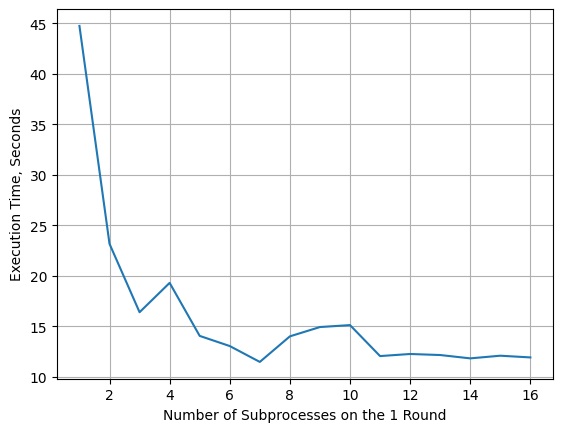

In [16]:
experiment_df = pd.DataFrame({'processes': iterations_processes[0], 'iter_one': iterations_time[0],  'iter_two': iterations_time[1], 'iter_three': iterations_time[2]})
plt.plot(experiment_df['processes'], experiment_df['iter_one'])
plt.xlabel('Number of Subprocesses on the 1 Round')
plt.grid()
plt.ylabel('Execution Time, Seconds')
plt.show()

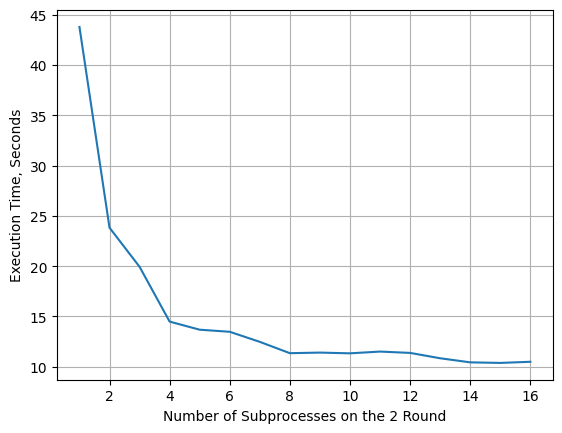

In [17]:
plt.plot(experiment_df['processes'], experiment_df['iter_two'])
plt.xlabel('Number of Subprocesses on the 2 Round')
plt.grid()
plt.ylabel('Execution Time, Seconds')
plt.show()

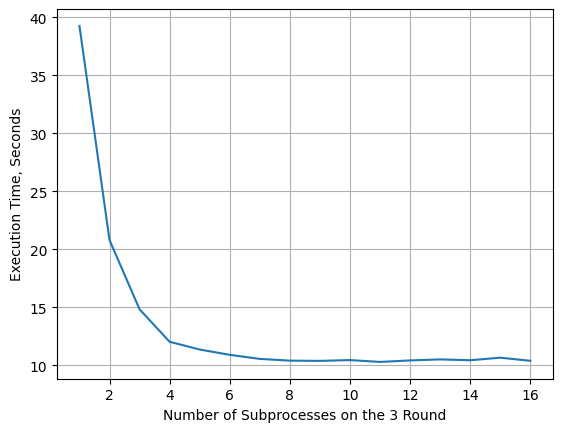

In [18]:
plt.plot(experiment_df['processes'], experiment_df['iter_three'])
plt.xlabel('Number of Subprocesses on the 3 Round')
plt.grid()
plt.ylabel('Execution Time, Seconds')
plt.show()

У таблиці:

In [19]:
experiment_df

,processes,iter_one,iter_two,iter_three
0,1,44.735188,43.783946,39.271311
1,2,23.169742,23.826998,20.814192
2,3,16.401435,19.939893,14.839453
3,4,19.303956,14.490517,12.040704
4,5,14.057023,13.687116,11.374417
5,6,13.052068,13.479485,10.915975
6,7,11.481244,12.478308,10.565728
7,8,14.011223,11.352478,10.416532
8,9,14.932922,11.411429,10.394200
9,10,15.126027,11.338340,10.463190


In [20]:
experiment_df['avg'] = (experiment_df['iter_one'] + experiment_df['iter_two'] + experiment_df['iter_three']) / 3
experiment_df

,processes,iter_one,iter_two,iter_three,avg
0,1,44.735188,43.783946,39.271311,42.596815
1,2,23.169742,23.826998,20.814192,22.603644
2,3,16.401435,19.939893,14.839453,17.060260
3,4,19.303956,14.490517,12.040704,15.278392
4,5,14.057023,13.687116,11.374417,13.039519
5,6,13.052068,13.479485,10.915975,12.482509
6,7,11.481244,12.478308,10.565728,11.508427
7,8,14.011223,11.352478,10.416532,11.926744
8,9,14.932922,11.411429,10.394200,12.246184
9,10,15.126027,11.338340,10.463190,12.309186


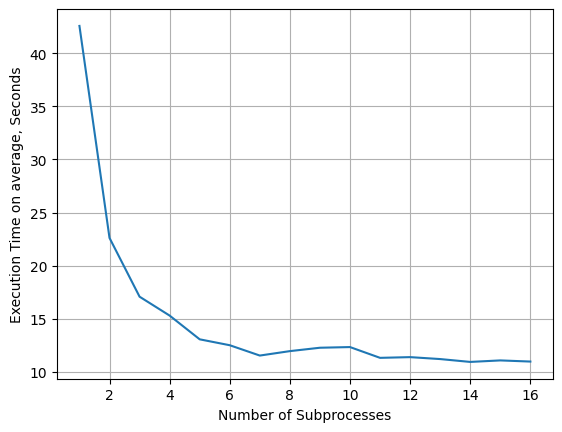

In [21]:
plt.plot(experiment_df['processes'], experiment_df['avg'])
plt.xlabel('Number of Subprocesses')
plt.grid()
plt.ylabel('Execution Time on average, Seconds')
plt.show()